In [1]:
# keras layers
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization

# keras model
from keras.models import Sequential

# keras preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# skimage
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave, imshow

%matplotlib inline

# others
import numpy as np
import os
import random
import tensorflow as tf

/home/saucecat/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Get images

<img src="images/woman.jpg" width=200>
<center><b>image -> numpy array</b></center>

In [2]:
image = img_to_array(load_img('images/woman.jpg'))
image = np.array(image, dtype=float)

print image.shape

(400, 400, 3)


In [3]:
image[:2]

array([[[171., 230., 246.],
        [170., 229., 245.],
        [171., 230., 248.],
        ...,
        [172., 231., 247.],
        [172., 231., 247.],
        [171., 230., 246.]],

       [[170., 229., 245.],
        [171., 230., 246.],
        [171., 230., 247.],
        ...,
        [172., 231., 247.],
        [171., 230., 246.],
        [171., 231., 247.]]])

# Prepare training data

<img src='images/image_Lab.png', width=500>
<center><b>RGB -> Lab</b></center>

<img src='images/Lab_train.png', width=500>
<center><b>Lab: X: L, Y: ab</b></center>

In [4]:
image_lab = rgb2lab(1.0 / 255 * image)
X = image_lab[:, :, 0]
Y = image_lab[:, :, 1:]
print('X range: [%.3f, %.3f]' %(X.min(), X.max()))
print('Y range: [%.3f, %.3f]' %(Y.min(), Y.max()))

# because our model output is [-1, 1]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)
print('X range: [%.3f, %.3f]' %(X.min(), X.max()))
print('Y range: [%.3f, %.3f]' %(Y.min(), Y.max()))

X range: [1.292, 90.486]
Y range: [-17.894, 40.266]
X range: [1.292, 90.486]
Y range: [-0.140, 0.315]


# Building the neural network

<img src='images/flow.png', width=600>
When we train the network, we use colored images. We convert RGB colors to the Lab color space. The black and white layer is our input and the two colored layers are the output.

In [5]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

# Finish model

In [6]:
model.compile(optimizer='rmsprop', loss='mse')

# Train model

In [7]:
model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 999ms/step - loss: 0.4482
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5175
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0097
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0074
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0064
Epoch 6/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0058
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0054
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0053
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0057
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0060
Epoch 11/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0053
Epoch 12/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0048
Epoch 13/1000
1/1 [=================

Epoch 103/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 104/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 105/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 106/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 107/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 108/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 109/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 110/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0027
Epoch 111/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035
Epoch 112/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 113/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0044
Epoch 114/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0028
Epoch 115/1000
1

Epoch 203/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 204/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 205/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 206/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 207/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 208/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 209/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 210/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 211/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 212/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 213/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 214/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 215/1000
1

Epoch 302/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 303/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 304/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 305/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 306/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 307/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 308/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.6711e-04
Epoch 309/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.4928e-04
Epoch 310/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.8182e-04
Epoch 311/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.3497e-04
Epoch 312/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.2000e-04
Epoch 313/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.1

Epoch 399/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.4122e-04
Epoch 400/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.0958e-04
Epoch 401/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.7868e-04
Epoch 402/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.1358e-04
Epoch 403/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.9682e-04
Epoch 404/1000
1/1 [==============================] - 0s 14ms/step - loss: 9.6074e-04
Epoch 405/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 406/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 407/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 408/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 409/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.9514e-04
Epoch 410/1000
1/1 [==============================] - 0s 14ms/step - l

1/1 [==============================] - 0s 13ms/step - loss: 9.8015e-04
Epoch 496/1000
1/1 [==============================] - 0s 14ms/step - loss: 9.7049e-04
Epoch 497/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 498/1000
1/1 [==============================] - 0s 14ms/step - loss: 6.3720e-04
Epoch 499/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.0790e-04
Epoch 500/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.2719e-04
Epoch 501/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.1117e-04
Epoch 502/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.2950e-04
Epoch 503/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.9108e-04
Epoch 504/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.7733e-04
Epoch 505/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.4477e-04
Epoch 506/1000
1/1 [==============================] - 0s 15ms/step - loss

Epoch 591/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.4626e-04
Epoch 592/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.4970e-04
Epoch 593/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.6367e-04
Epoch 594/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.6006e-04
Epoch 595/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.7208e-04
Epoch 596/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.0318e-04
Epoch 597/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.4601e-04
Epoch 598/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.1137e-04
Epoch 599/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.9688e-04
Epoch 600/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.1503e-04
Epoch 601/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.1724e-04
Epoch 602/1000
1/1 [==============================] - 

Epoch 687/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.9281e-04
Epoch 688/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.3199e-04
Epoch 689/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.3325e-04
Epoch 690/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.9695e-04
Epoch 691/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.4085e-04
Epoch 692/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.5796e-04
Epoch 693/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.1962e-04
Epoch 694/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.0038e-04
Epoch 695/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.7830e-04
Epoch 696/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.5737e-04
Epoch 697/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.9221e-04
Epoch 698/1000
1/1 [==============================] - 

Epoch 783/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.8347e-04
Epoch 784/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.8339e-04
Epoch 785/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.2328e-04
Epoch 786/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.7153e-04
Epoch 787/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.9497e-04
Epoch 788/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.6965e-04
Epoch 789/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.4864e-04
Epoch 790/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.9240e-04
Epoch 791/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.1276e-04
Epoch 792/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.3141e-04
Epoch 793/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.7203e-04
Epoch 794/1000
1/1 [==============================] - 

Epoch 879/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0244e-04
Epoch 880/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.2890e-04
Epoch 881/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.7615e-04
Epoch 882/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.5741e-04
Epoch 883/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.5872e-04
Epoch 884/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.2769e-04
Epoch 885/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.1039e-04
Epoch 886/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.3067e-04
Epoch 887/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.6164e-04
Epoch 888/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.5501e-04
Epoch 889/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.4918e-04
Epoch 890/1000
1/1 [==============================] - 

Epoch 975/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.1269e-04
Epoch 976/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0290e-04
Epoch 977/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.9252e-04
Epoch 978/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.6195e-04
Epoch 979/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4877e-04
Epoch 980/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.5344e-04
Epoch 981/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.7078e-04
Epoch 982/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.6266e-04
Epoch 983/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.5159e-04
Epoch 984/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.2944e-04
Epoch 985/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.3233e-04
Epoch 986/1000
1/1 [==============================] - 

# Evaluate model

In [8]:
print(model.evaluate(X, Y, batch_size=1))

1/1 [==============================] - 0s 24ms/step
0.00031904818024486303


# Get model output

In [9]:
output = model.predict(X)
output *= 128
print output.shape

(1, 400, 400, 2)


# Output colorizations

In [10]:
cur = np.zeros((400, 400, 3))
cur[:, :, 0] = X[0][:, :, 0]
cur[:, :, 1:] = output[0]

(-0.5, 399.5, 399.5, -0.5)

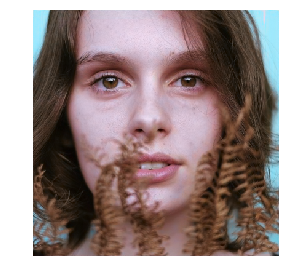

In [12]:
import matplotlib.pyplot as plt

imshow(lab2rgb(cur))
plt.axis('off')

# Understand the Alpha-version
To understand the weakness of the Alpha-version, try coloring an image it has not been trained on. If you try it, you’ll see that it makes a poor attempt. It’s because the network has memorized the information. It has not learned how to color an image it hasn’t seen before. But this is what we’ll do in the Beta-version - we’ll teach our network to generalize.